In [ ]:
import pandas as pd
import numpy as np

gamma = 0.9
win_past, win_ftr, offset = 20, 20, 50
df_path = "processed_aapl_data.csv"

processed_df = pd.read_csv(df_path)[offset:]

# Set1: Standardise each window with general min-max
set1 = [
    'Open', 'High', 'Low', 'Close', 'SMA_10',
    'SMA_50', 'EMA_10', 'EMA_50'
    ]

# Set2: Standardise each window with general min-max
set2 = ['MACD', 'MACD_Signal', 'MACD_Hist']

# Set3: Standardise each window individually
set3 = ['Volume']

# Set4: Standardise through history individually
set4 = ['RSI_14'] 

#####SET1#####
set1_np = processed_df[set1].to_numpy()
set1_stack_list = [set1_np[i:len(set1_np) - win_past + i + 1] for i in range(win_past)]
set1_stack = np.stack(set1_stack_list, axis=1)
set1_mean = set1_stack.mean(axis=(1, 2)).reshape((len(set1_stack), 1, 1))
set1_std = set1_stack.std(axis=(1, 2)).reshape((len(set1_stack), 1, 1))
set1_standard = (set1_stack - set1_mean) / set1_std

#####SET2#####
set2_np = processed_df[set2].to_numpy()
set2_stack_list = [set2_np[i:len(set2_np) - win_past + i + 1] for i in range(win_past)]
set2_stack = np.stack(set2_stack_list, axis=1)
set2_mean = set2_stack.mean(axis=(1, 2)).reshape((len(set2_stack), 1, 1))
set2_std = set2_stack.std(axis=(1, 2)).reshape((len(set2_stack), 1, 1))
set2_standard = (set2_stack - set2_mean) / set2_std

#####SET3#####
set3_np = processed_df[set3].to_numpy()
set3_stack_list = [set3_np[i:len(set3_np) - win_past + i + 1] for i in range(win_past)]
set3_stack = np.stack(set3_stack_list, axis=1)
set3_mean = set3_stack.mean(axis=1).reshape((len(set3_stack), 1, 1))
set3_std = set3_stack.std(axis=1).reshape((len(set3_stack), 1, 1))
set3_standard = (set3_stack - set3_mean) / set3_std

#####SET4#####
set4_np = processed_df[set4].to_numpy()
set4_mean = set4_np.mean(axis=0).reshape(1, set4_np.shape[1])
set4_std = set4_np.std(axis=0).reshape(1, set4_np.shape[1])
set4_standard = (set4_np - set4_mean) / set4_std
set4_stack_list = [set4_standard[i:len(set4_standard) - win_past + i + 1] for i in range(win_past)]
set4_stack = np.stack(set4_stack_list, axis=1)

#####INPUT TENSOR#####
model_inputs = np.concatenate((
    set1_standard,
    set2_standard,
    set3_standard,
    set4_stack
), axis=2)[:-win_ftr]

#####LABELS#####


In [56]:
model_inputs.shape

(2427, 20, 13)

In [ ]:

# close = ['Close']
# window_np = processed_df[window_norm].to_numpy()
# hist_np = processed_df[hist_norm].to_numpy()
# close_np = processed_df[close].to_numpy()

# change_np = close_np[1:] / close_np[:-1]
# stack_list = [change_np[win_past + i:win_past + len(change_np) - win_ftr + i] for i in range(win_ftr)]
# change_stack = np.concatenate(stack_list, axis=1)
# discounts = np.array([[gamma**i for i in range(win_ftr)]])
# change_discounts = (change_stack - 1) * discounts
# rewards = change_discounts.sum(axis=1)
# rewards = rewards.reshape((len(rewards), 1))[win_past:]
# rewards_norm = rewards / np.abs(rewards).max()

# win_trim = window_np[1:len(window_np) - win_ftr]
# hist_trim = hist_np[1:len(window_np) - win_ftr]
# close_trim = close_np[1 + win_past :len(window_np) - win_ftr]

# win_list = [win_trim[i:len(win_trim) - win_past + i] for i in range(win_past)]
# win_stack = np.stack(win_list, axis=1)
# _min = win_stack.min(axis=1).reshape((win_stack.shape[0], 1, win_stack.shape[2]))
# _max = win_stack.max(axis=1).reshape((win_stack.shape[0], 1, win_stack.shape[2]))
# window_norm_np = (win_stack - _min) / (_max - _min)

# _min = hist_trim.min(axis=1).reshape(hist_trim.shape[0], 1)
# _max = hist_trim.max(axis=1).reshape(hist_trim.shape[0], 1)
# hist_norm_np = (hist_trim - _min) / (_max - _min)
# hist_list = [hist_norm_np[i:len(win_trim) - win_past + i] for i in range(win_past)]
# mod_ins = np.stack(hist_list, axis=1)

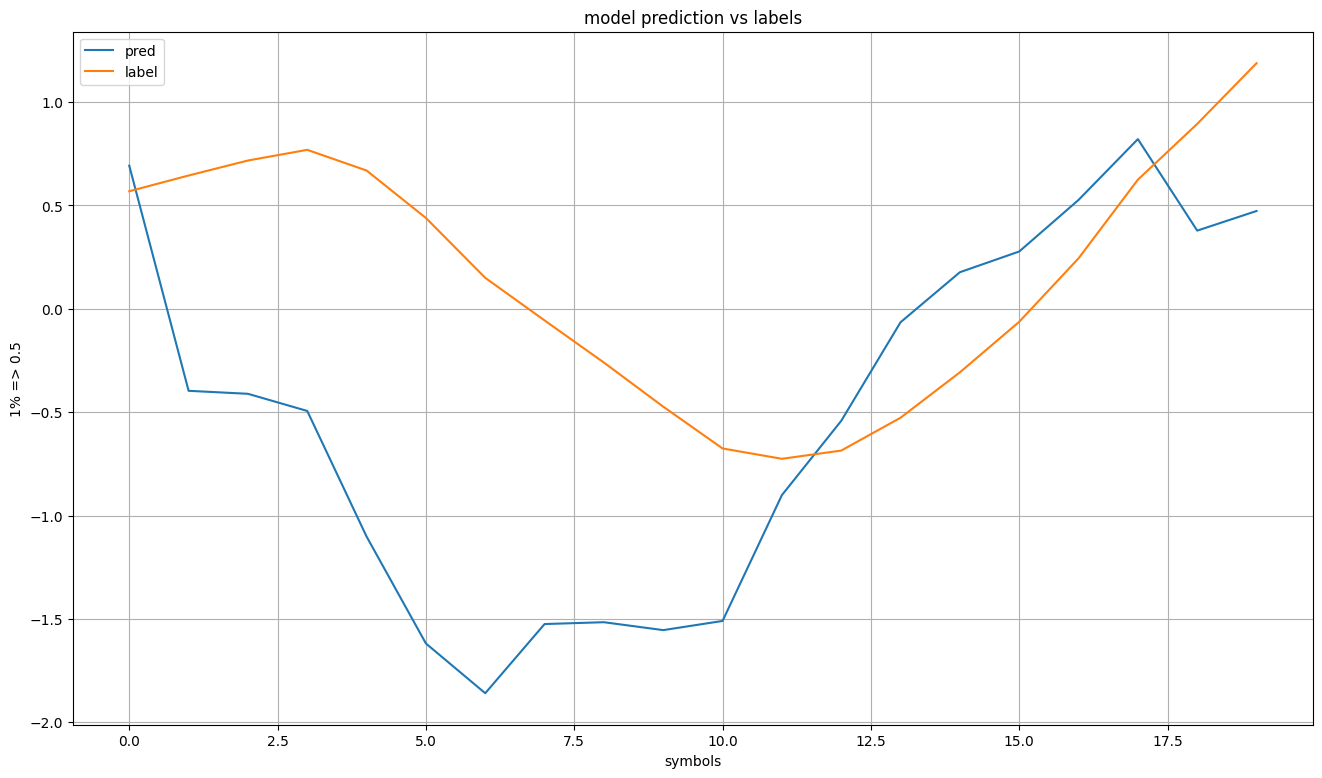

In [43]:
from matplotlib import pyplot as plt

# pred = model(x_v).to('cpu').detach().numpy()
# label = y_v.to('cpu').detach().numpy()

pred = set2_standard[0, :, 2]
label = set2_standard[0, :, 1]

sym_index = np.arange(pred.shape[0])
plt.figure(figsize=(16, 9))
plt.title("model prediction vs labels")
plt.xlabel("symbols")
plt.ylabel("1% => 0.5")

plt.plot(pred, label="pred")
plt.plot(label, label="label")

plt.grid()
plt.legend()
plt.show()

In [63]:
close_trim.shape

(2425, 1)

In [ ]:
# import pandas as pd
# import numpy as np

# gamma = 0.9
# win_past, win_ftr, offset = 20, 20, 50
# df_path = "processed_aapl_data.csv"

# processed_df = pd.read_csv(df_path)[offset:]

# close_np = processed_df[['Close']].to_numpy()
# change_np = close_np[1:] / close_np[:-1]
# stack_list = [change_np[i:len(change_np) - win_ftr + i] for i in range(win_ftr)]
# change_stack = np.concatenate(stack_list, axis=1)
# discounts = np.array([[gamma**i for i in range(win_ftr)]])
# change_discounts = (change_stack - 1) * discounts
# rewards = change_discounts.sum(axis=1)
# rewards = rewards.reshape((len(rewards), 1))[win_past:]
# rewards_norm = rewards / np.abs(rewards).max()

# # Columns that will be normalized each window
# mod1_norm = [ 'Open', 'High', 'Low', 'Close', 'SMA_10', 'SMA_50' ]
# mod1_np = processed_df[mod1_norm].to_numpy()
# mod1_trim = mod1_np[1:len(mod1_np) - win_ftr]
# mod1_norm_np = (mod1_trim - mod1_trim.min()) / (mod1_trim.max() - mod1_trim.min())




In [ ]:
processed_df

0.2202196459080581

In [7]:
import pandas as pd
import numpy as np

gamma = 0.9
win_past, win_ftr, offset = 20, 20, 50
df_path = "processed_aapl_data.csv"

processed_df = pd.read_csv(df_path)[offset:]

# Columns that will be normalized each window
window_norm = [
    'Open', 'High', 'Low', 'Close', 'Adj Close','SMA_10',
    'SMA_50', 'EMA_10', 'EMA_50', 
]

# Columns that will be normalized throughout whole history
hist_norm = [
    'Volume', 'Doji', 'Engulfing', 'Hammer', 'Morning Star',
    'Evening Star', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist'
]

close = ['Close']
window_np = processed_df[window_norm].to_numpy()
hist_np = processed_df[hist_norm].to_numpy()
close_np = processed_df[close].to_numpy()

change_np = close_np[1:] / close_np[:-1]
stack_list = [change_np[i:len(change_np) - win_ftr + i] for i in range(win_ftr)]
change_stack = np.concatenate(stack_list, axis=1)
discounts = np.array([[gamma**i for i in range(win_ftr)]])
change_discounts = (change_stack - 1) * discounts
rewards = change_discounts.sum(axis=1)
rewards = rewards.reshape((len(rewards), 1))[win_past:]
rewards_norm = rewards / np.abs(rewards).max()

win_trim = window_np[1:len(window_np) - win_ftr]
hist_trim = hist_np[1:len(window_np) - win_ftr]
close_trim = close_np[1:len(window_np) - win_ftr]

window_norm_np = (win_trim - win_trim.min()) / (win_trim.max() - win_trim.min())

_min = hist_trim.min(axis=1).reshape(hist_trim.shape[0], 1)
_max = hist_trim.max(axis=1).reshape(hist_trim.shape[0], 1)
hist_norm_np = (hist_trim - _min) / (_max - _min)

df_norm = np.concatenate((window_norm_np, hist_norm_np), axis=1)
stack_list_2 = [df_norm[i:len(df_norm) - win_past + i] for i in range(win_past)]
mod_ins = np.stack(stack_list_2, axis=1)

In [ ]:
import time
import torch
from torch import optim
import torch_ops as ops
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x, y = data["x"], data["y"]
v_split = 0.1
v_cutoff = int(len(x)*v_split)
x_t = torch.tensor(x[:v_cutoff], dtype=torch.float32).to(device)
x_v = torch.tensor(x[v_cutoff:], dtype=torch.float32).to(device)
y_t = torch.tensor(y[:v_cutoff], dtype=torch.float32).to(device)
y_v = torch.tensor(y[v_cutoff:], dtype=torch.float32).to(device)

win_past, features = x.shape[1], x.shape[2]
epochs, batch_size, lr, l2_decay = 1000, 64, 5e-4, 0
rate_schedule = ops.rate_schedule_cosine(
    rate_max=5e-3,
    rate_min=5e-5,
    epochs=epochs,
    decay_param=1e-2)

best_score = 1
scores = []
verbose = True
for iteration in range(1):
    # model_config = random_model_config()
    model_config = {
        'neurons': [64, 1],
        'activations': ['selu','tanh'],
        'dropouts': [0.0, 0.0]
    }

    model = georgia_1(model_config, win_past=win_past, features=features).to(device)
    loss_fn = nn.SmoothL1Loss()
    optimizer = optim.NAdam(params=model.parameters(), lr=lr, weight_decay=l2_decay)

    if verbose:
        loss = ops.test_loop(x_t, y_t, model, loss_fn, batch_size)
        test_loss = ops.test_loop(x_v, y_v, model, loss_fn, batch_size)
        print("---------- Epoch 0 ----------")
        print(f"loss: {loss:1.4f}, test loss: {test_loss:1.4f}")

    best_test_loss = 999
    t0 = time.perf_counter()
    for epoch in range(epochs):
        for param_group in optimizer.param_groups:
            param_group['lr'] = rate_schedule[epoch]
        loss = ops.train_loop(x_t, y_t, model, loss_fn, optimizer, batch_size)
        test_loss_new = ops.test_loop(x_v, y_v, model, loss_fn, batch_size)
        best_test_loss = min(best_test_loss, test_loss_new)

        if verbose:
            if test_loss_new < test_loss or epoch == epochs - 1:
                print(f"---------- Epoch {epoch + 1} ----------")
                print(f"loss: {loss:1.4f}, test loss: {test_loss_new:1.4f}")
            
            improvement = test_loss_new < test_loss
            if improvement:
                test_loss = test_loss_new
                print(f"Checkpoint: test loss = {test_loss:1.4f} <---------------")
                torch.save(model.state_dict(), r"models/hanzo_0")

    t1 = time.perf_counter()
    model_config['score'] = best_test_loss
    scores.append(model_config)
    best_score = min(best_score, best_test_loss)

    print(f"Iteration {iteration}, t = {t1 - t0:1.2f}, score = {best_test_loss:1.4f}, best score = {best_score:1.4f}")

---------- Epoch 0 ----------
loss: 0.5548, test loss: 0.4735
---------- Epoch 1000 ----------
loss: 0.4166, test loss: 0.5688
Iteration 0, t = 16.33, score = 0.4755, best score = 0.4755


In [ ]:
import yfinance as yf

play_list = ["AAPL", "SPY", "^VIX", "^SOX"]

df = yf.download("AAPL", period="10y", interval="1d", ignore_tz=True)
df.to_csv("aapl_data.csv", index=True)

In [ ]:
import numpy as np
import talib
import pandas as pd

# Load the CSV file
aapl_df = pd.read_csv("aapl_data.csv")

# Ensure the Date column is in datetime format
if 'Date' in aapl_df.columns:
    aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])

# Sort by date
aapl_df = aapl_df.sort_values(by='Date', ascending=True) if 'Date' in aapl_df.columns else aapl_df

### 1. Candlestick Pattern Recognition ###
patterns = {
    "Doji": talib.CDLDOJI,
    "Engulfing": talib.CDLENGULFING,
    "Hammer": talib.CDLHAMMER,
    "Morning Star": talib.CDLMORNINGSTAR,
    "Evening Star": talib.CDLEVENINGSTAR,
}

for pattern_name, pattern_func in patterns.items():
    aapl_df[pattern_name] = pattern_func(aapl_df['Open'], aapl_df['High'], aapl_df['Low'], aapl_df['Close']) / 100

### 2. Technical Indicators ###
aapl_df['SMA_10'] = talib.SMA(aapl_df['Close'], timeperiod=10)
aapl_df['SMA_50'] = talib.SMA(aapl_df['Close'], timeperiod=50)
aapl_df['EMA_10'] = talib.EMA(aapl_df['Close'], timeperiod=10)
aapl_df['EMA_50'] = talib.EMA(aapl_df['Close'], timeperiod=50)
aapl_df['RSI_14'] = talib.RSI(aapl_df['Close'], timeperiod=14)
aapl_df['MACD'], aapl_df['MACD_Signal'], aapl_df['MACD_Hist'] = talib.MACD(aapl_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ### 3. Normalization ###
# price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']
# aapl_df[price_columns] = (aapl_df[price_columns] - aapl_df[price_columns].min()) / (aapl_df[price_columns].max() - aapl_df[price_columns].min())

# ### 4. Windowed Representation ###
# window_size = 3  
# feature_columns = ['Close', 'Volume', 'SMA_10', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']

# for col in feature_columns:
#     for i in range(1, window_size + 1):
#         aapl_df[f"{col}_lag{i}"] = aapl_df[col].shift(i)

# aapl_df = aapl_df.dropna().reset_index(drop=True)

# Save the processed data
aapl_df.to_csv("processed_aapl_data.csv", index=False)

print("Feature engineering completed! Processed data saved as 'processed_aapl_data.csv'.")

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces

class StockTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000, trading_fee=0.001, window_size=20):
        super(StockTradingEnv, self).__init__()
        
        # Load market data
        self.df = df.copy()
        self.initial_balance = initial_balance
        self.trading_fee = trading_fee
        self.window_size = window_size
        self.done = False
        
        # Define state space (features from the dataset)
        self.feature_columns = [
            'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Doji',
            'Engulfing', 'Hammer', 'Morning Star', 'Evening Star', 'SMA_10',
            'SMA_50', 'EMA_10', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal',
            'MACD_Hist'
        ]
        self.state_size = len(self.feature_columns)
        
        # Define action space (Buy, Sell, Hold)
        self.action_space = spaces.Discrete(3)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.state_size,), dtype=np.float32)
        
        # Portfolio state variables
        self.balance = initial_balance
        self.shares_held = 0
        self.portfolio_value = initial_balance
        self.next_portfolio_value = initial_balance
        self.returns = []
        self.actions = []
        
    def reset(self):
        """Resets the environment to the initial state."""
        self.done = False
        self.balance = self.initial_balance
        self.shares_held = 0
        self.portfolio_value = self.initial_balance
        self.returns = []
        
        return self._next_observation()
    


In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym

# Load the processed AAPL stock data
processed_aapl_df = pd.read_csv("processed_aapl_data.csv")

# Ensure Date is in datetime format
if 'Date' in processed_aapl_df.columns:
    processed_aapl_df['Date'] = pd.to_datetime(processed_aapl_df['Date'])

# Sort the dataset
processed_aapl_df = processed_aapl_df.sort_values(by='Date', ascending=True)


# Initialize the environment
env = StockTradingEnv(processed_aapl_df)

# Reset the environment
state = env.reset()

# Run a small test episode (10 steps)
num_steps = 10
print("\n--- Running Test Episode ---\n")
for _ in range(num_steps):
    action = env.action_space.sample()  # Take a random action (Buy, Sell, Hold)
    next_state, reward, done, _ = env.step(action)  # Step the environment
    print(f"action: {action}")
    env.render()  # Print current portfolio state
    
    if done:
        print("Episode ended early.")
        break  # Stop if episode is done

print("\n--- Test Completed ---")



--- Running Test Episode ---

action: 2
Step: 71, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0
action: 2
Step: 72, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 73, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 74, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 75, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 76, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 77, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 78, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 79, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0, Sharpe Ratio: 0.0
action: 2
Step: 80, Balance: 10000.00, Shares Held: 0, Portfolio Value: 10000.0,

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

# Define preprocessing function
def preprocess_state(df, current_step, window_size=20):
    df_window = df[current_step - window_size:current_step].copy()
    norm_cols = [
        'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Doji',
        'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50', 'RSI_14', 'MACD',
        'MACD_Signal', 'MACD_Hist'
    ]
    df_copy = df_window[norm_cols].copy()
    df_window[norm_cols] = (df_copy - df_copy.min()) / (df_copy.max() - df_copy.min())

    op_cols = [
        'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Doji',
        'Engulfing', 'Hammer', 'Morning Star', 'Evening Star', 'SMA_10',
        'SMA_50', 'EMA_10', 'EMA_50', 'RSI_14', 'MACD', 'MACD_Signal',
        'MACD_Hist'
    ]
    df_tensor = torch.tensor(df_window[op_cols].to_numpy(), dtype=torch.float32)

    return df_tensor

# Define the Deep Q-Network (DQN)
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim, window_size=20):
        super(DQN, self).__init__()
        self.flat1 = nn.Flatten()
        self.fc1 = nn.Linear(input_dim * window_size, 128)  # Adjusted for 20-day window
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = self.flat1(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)  # Q-values for each action

# Define the DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size, window_size=20, gamma=0.99, lr=0.001, batch_size=32, memory_size=10000):
        self.action_size = action_size
        self.gamma = gamma  # Discount factor
        self.lr = lr
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        
        self.model = DQN(state_size, action_size, window_size=window_size)
        self.target_model = DQN(state_size, action_size, window_size=window_size)
        self.target_model.load_state_dict(self.model.state_dict())  # Sync target model
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()
        
    def select_action(self, state, epsilon=0.1):
        """Select an action using an epsilon-greedy policy."""
        if random.random() < epsilon:
            return random.randint(0, self.action_size - 1)  # Random action
        with torch.no_grad():
            return torch.argmax(self.model(state)).item()  # Best action from Q-network
    
    def store_experience(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def train(self):
        """Train the agent using experience replay."""
        if len(self.memory) < self.batch_size:
            return
        
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.stack(states)
        actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
        rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1)
        next_states = torch.stack(next_states)
        dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1)

        q_values = self.model(states).gather(1, actions)
        next_q_values = self.target_model(next_states).max(1)[0].unsqueeze(1)
        target_q_values = rewards + (self.gamma * next_q_values * (1 - dones))
        
        loss = self.criterion(q_values, target_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    
    def update_target_model(self):
        """Sync the target model with the main model."""
        self.target_model.load_state_dict(self.model.state_dict())


In [4]:
import torch
import numpy as np
import pandas as pd

# Load Data
df = pd.read_csv("processed_aapl_data.csv")

env = StockTradingEnv(df)
state_size = len(env.feature_columns)
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

episodes = 500  # Number of training episodes
batch_size = 32  # Batch size for experience replay
epsilon_decay = 0.995  # Decay factor for epsilon-greedy exploration
min_epsilon = 0.01  # Minimum exploration probability
update_target_every = 10  # Frequency to update target network

epsilon = 1.0  # Initial exploration probability

def train():
    global epsilon
    
    for episode in range(episodes):
        state = preprocess_state(df, env.current_step)  # Preprocess initial state
        env.reset()
        total_reward = 0
        done = False
        
        while not done:
            action = agent.select_action(state.unsqueeze(0), epsilon)
            next_state, reward, done, _ = env.step(action)
            next_state = preprocess_state(df, env.current_step)
            agent.store_experience(state, action, reward, next_state, done)
            agent.train()
            state = next_state
            total_reward += reward
            
        if episode % update_target_every == 0:
            agent.update_target_model()
            
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward:.2f}, Epsilon: {epsilon:.4f}")

if __name__ == "__main__":
    train()
    torch.save(agent.model.state_dict(), "dqn_trading_model.pth")  # Save trained model


Episode 1/500, Total Reward: 110.40, Epsilon: 0.9950
Episode 2/500, Total Reward: 127.65, Epsilon: 0.9900
Episode 3/500, Total Reward: -21.91, Epsilon: 0.9851
Episode 4/500, Total Reward: 17.82, Epsilon: 0.9801
Episode 5/500, Total Reward: -22.41, Epsilon: 0.9752
Episode 6/500, Total Reward: 60.34, Epsilon: 0.9704
Episode 7/500, Total Reward: -16.41, Epsilon: 0.9655
Episode 8/500, Total Reward: -25.14, Epsilon: 0.9607
Episode 9/500, Total Reward: 61.39, Epsilon: 0.9559
Episode 10/500, Total Reward: 103.03, Epsilon: 0.9511
Episode 11/500, Total Reward: 62.98, Epsilon: 0.9464
Episode 12/500, Total Reward: 59.77, Epsilon: 0.9416
Episode 13/500, Total Reward: 11.52, Epsilon: 0.9369
Episode 14/500, Total Reward: 124.32, Epsilon: 0.9322
Episode 15/500, Total Reward: -25.63, Epsilon: 0.9276
Episode 16/500, Total Reward: 2.38, Epsilon: 0.9229
Episode 17/500, Total Reward: 102.37, Epsilon: 0.9183
Episode 18/500, Total Reward: 23.02, Epsilon: 0.9137
Episode 19/500, Total Reward: 53.70, Epsilon: 

In [5]:
env.returns

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-0.005840720376230283),
 np.float64(-0.005488610934734102),
 np.float64(-0.006607002604372373),
 np.float64(-0.002973434066809804),
 np.float64(0.011458222687551395),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-0.03208378059294362),
 np.float64(0.006629467378548215),
 np.float64(-

In [50]:
batch = random.sample(agent.memory, agent.batch_size)
states, actions, rewards, next_states, dones = zip(*batch)

states = torch.stack(states)
actions = torch.tensor(actions, dtype=torch.long).unsqueeze(1)
rewards = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1)
next_states = torch.stack(next_states)
dones = torch.tensor(dones, dtype=torch.float32).unsqueeze(1)

q_values = agent.model(states).gather(1, actions)
next_q_values = agent.target_model(next_states).max(1)[0].unsqueeze(1)
target_q_values = rewards + (agent.gamma * next_q_values * (1 - dones))

In [ ]:
target_q_values.shape